In [1]:
import os
import math
import pickle
import numpy as np
from math import log
from scipy import signal 
import matplotlib as mpl
from statistics import mean
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 6
rcParams.update({'figure.max_open_warning': 0, 'font.size': 14, 'axes.titlesize': 14,
                 'axes.labelsize': 14, 'axes.grid':True, 'xtick.direction': 'in', 'ytick.direction': 'in',
                 'ytick.right': True, 'xtick.top':True, 'ytick.major.size': 10, 'xtick.major.size': 10,
                 'legend.fancybox': True, 'legend.markerscale': 0.8, 'legend.handlelength': 5.0})

#from cycler import cycler
mpl.rcParams['grid.linestyle'] = '-.'
#rcParams.keys() 
#plt.style.use('dark_background')
#print(plt.style.available)

In [3]:
pkl_file = open('../2020-03-06_11-10-01.pkl', 'rb')
mydata = pickle.load(pkl_file)
mydata.keys()

dict_keys(['Ch1', 'Ch2', 'Ch3', 'Ch4', 'Ch5', 'Ch7'])

In [4]:
print(mydata['Ch4'].shape)   

(9993, 2000)


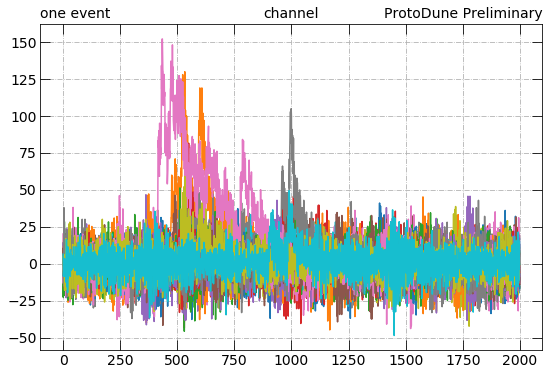

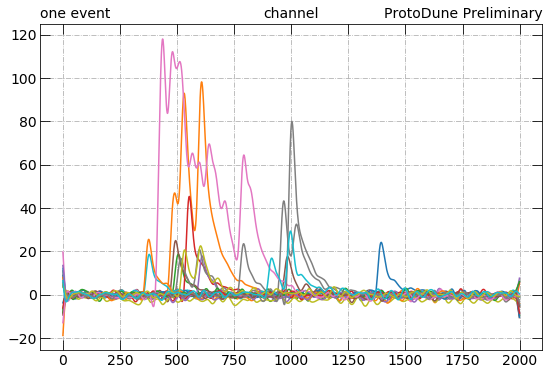

In [5]:
for x in range(20):
    #print(x)
    data=(mydata['Ch4'][x])
    plt.plot((data))
    plt.title('channel')
    plt.title('one event', loc='left')
    plt.title('ProtoDune Preliminary', loc='right')
    plt.grid(True)

plt.show()


for x in range(20):
    #print(x)
    data=(mydata['Ch4'][x])
    b, a = signal.butter(3, 0.05)
    zi = signal.lfilter_zi(b, a)
    z, _ = signal.lfilter(b, a, data, zi=zi*data[0])
    z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
    y = signal.filtfilt(b, a, data)
    plt.plot((y))
    plt.title('channel')
    plt.title('one event', loc='left')
    plt.title('ProtoDune Preliminary', loc='right')
    plt.grid(True)

plt.show()

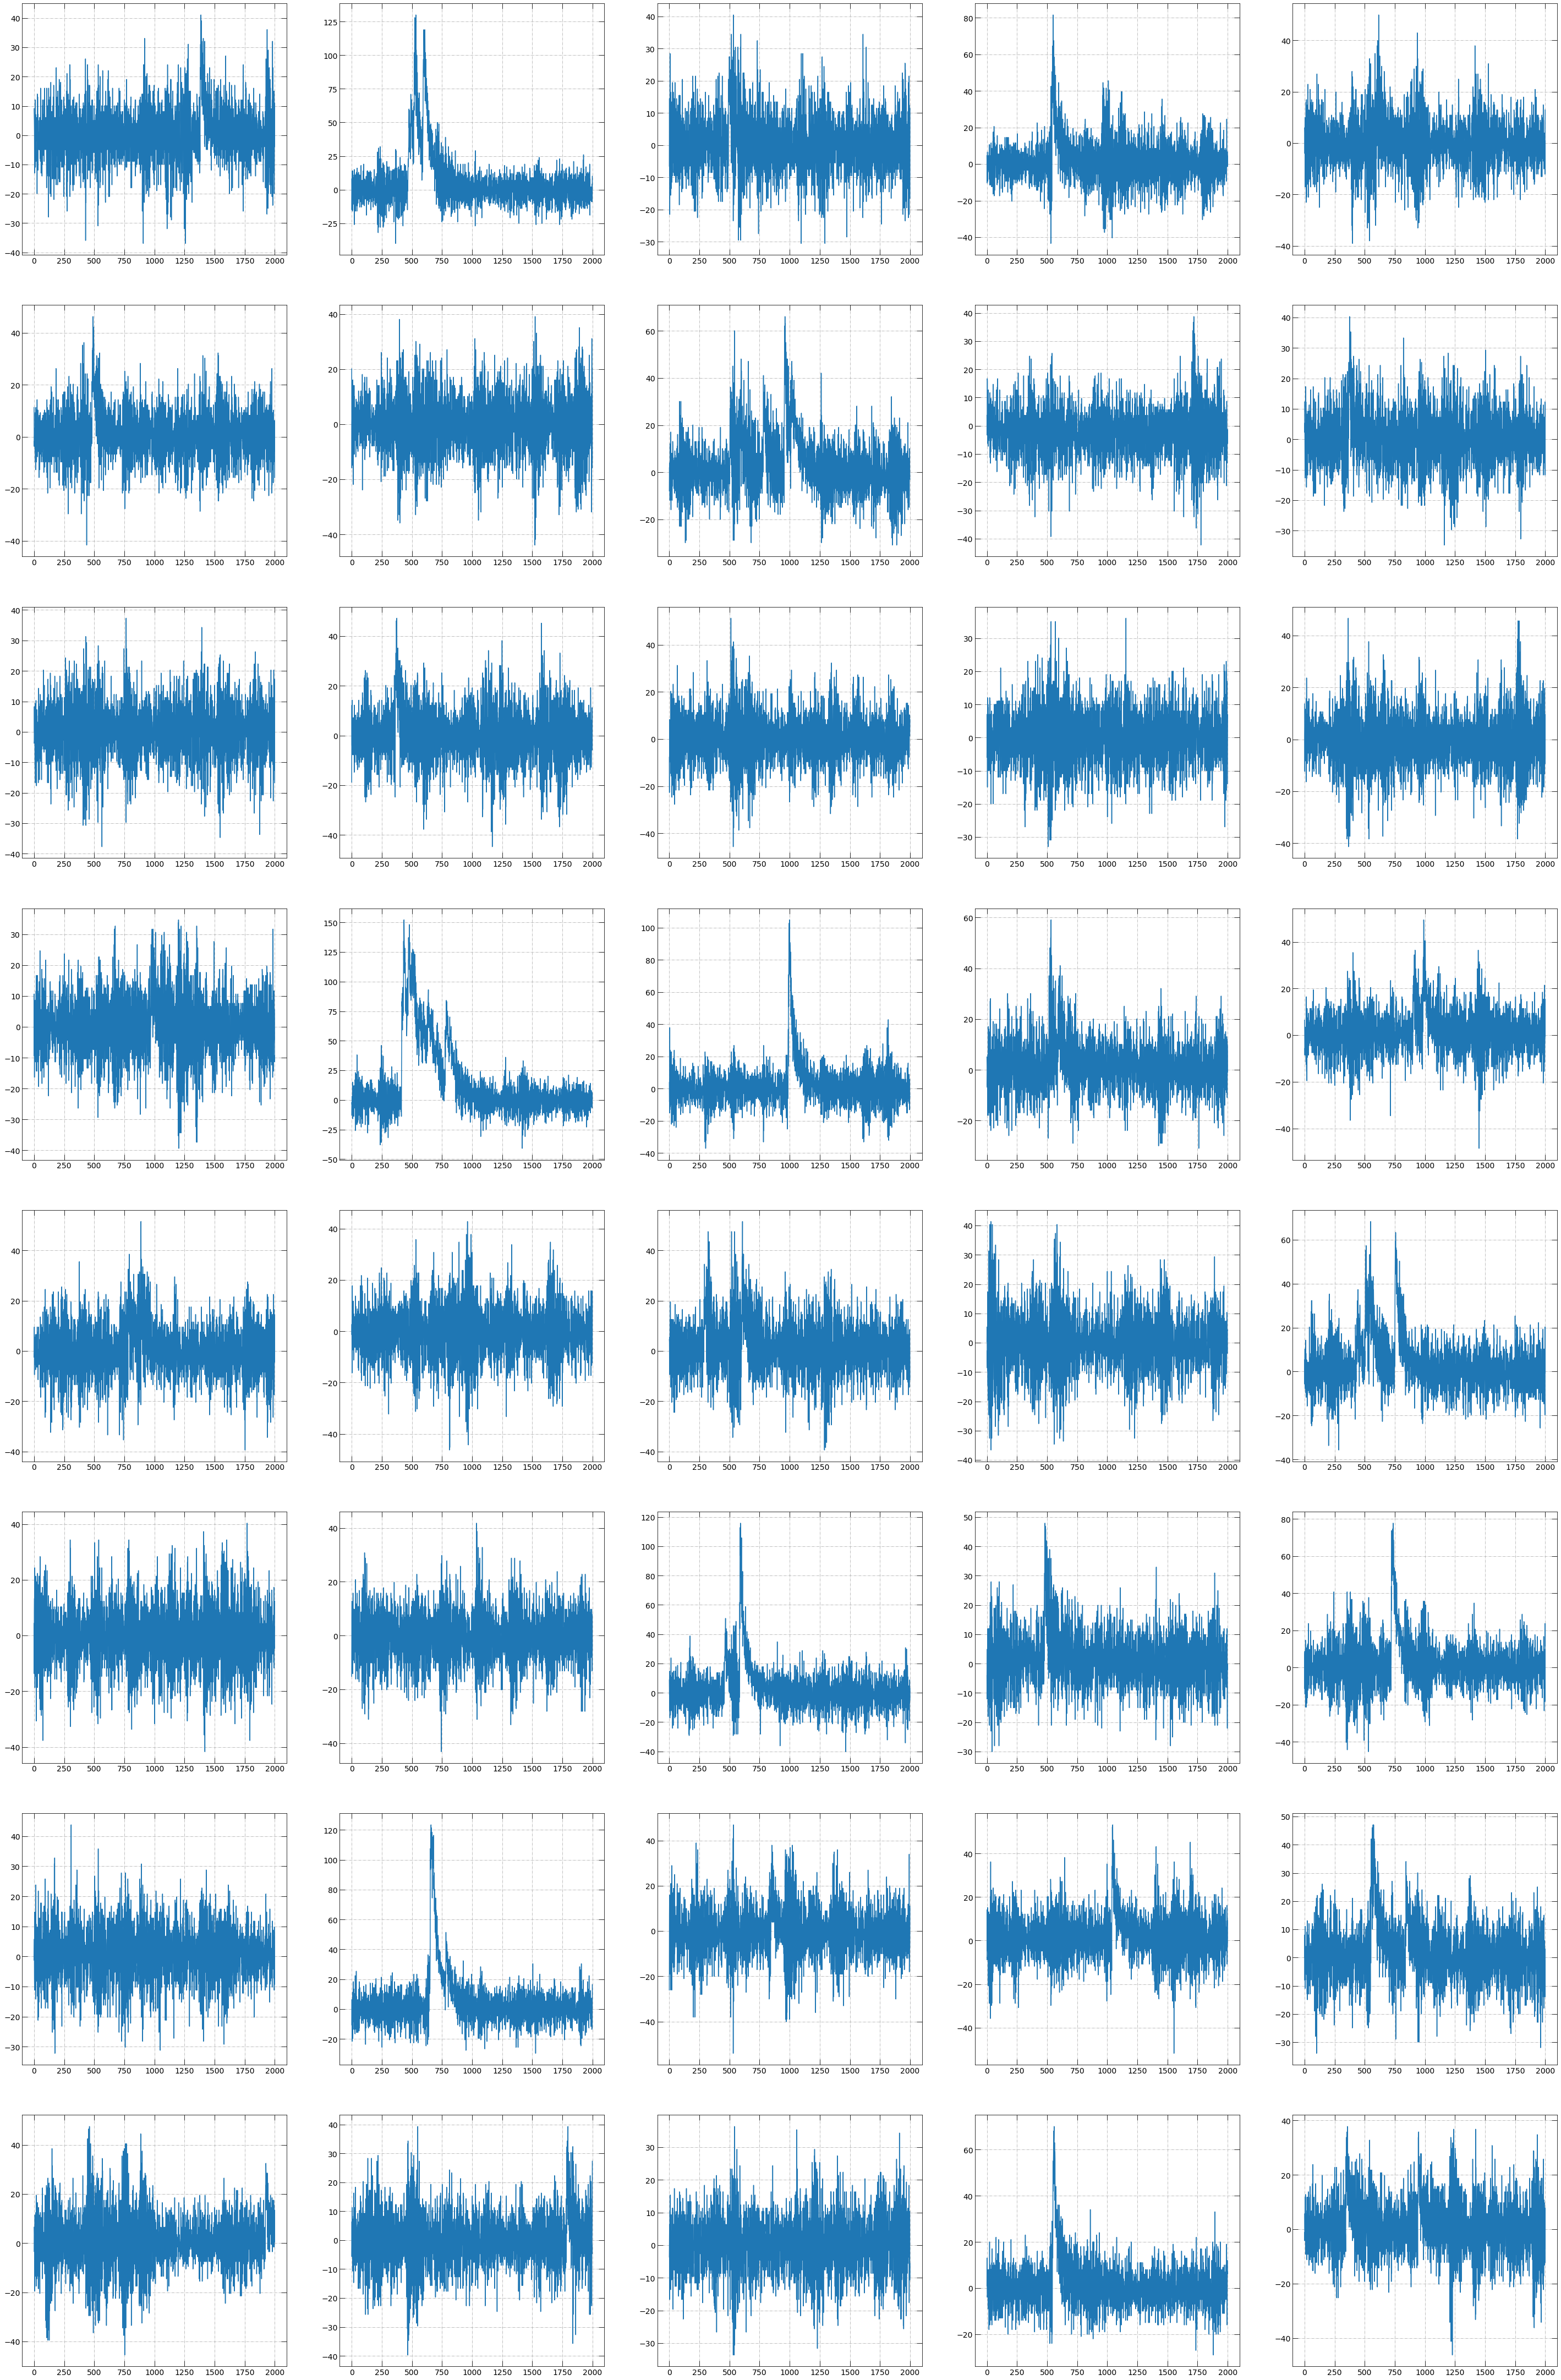

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

nrows, ncols = 20, 5

fig = plt.figure(figsize=(50,200))    
for i in range(1,41):
    ax = fig.add_subplot(nrows, ncols, i)
    data=mydata['Ch4'][i-1]  
    ax.plot(data)

plt.show()

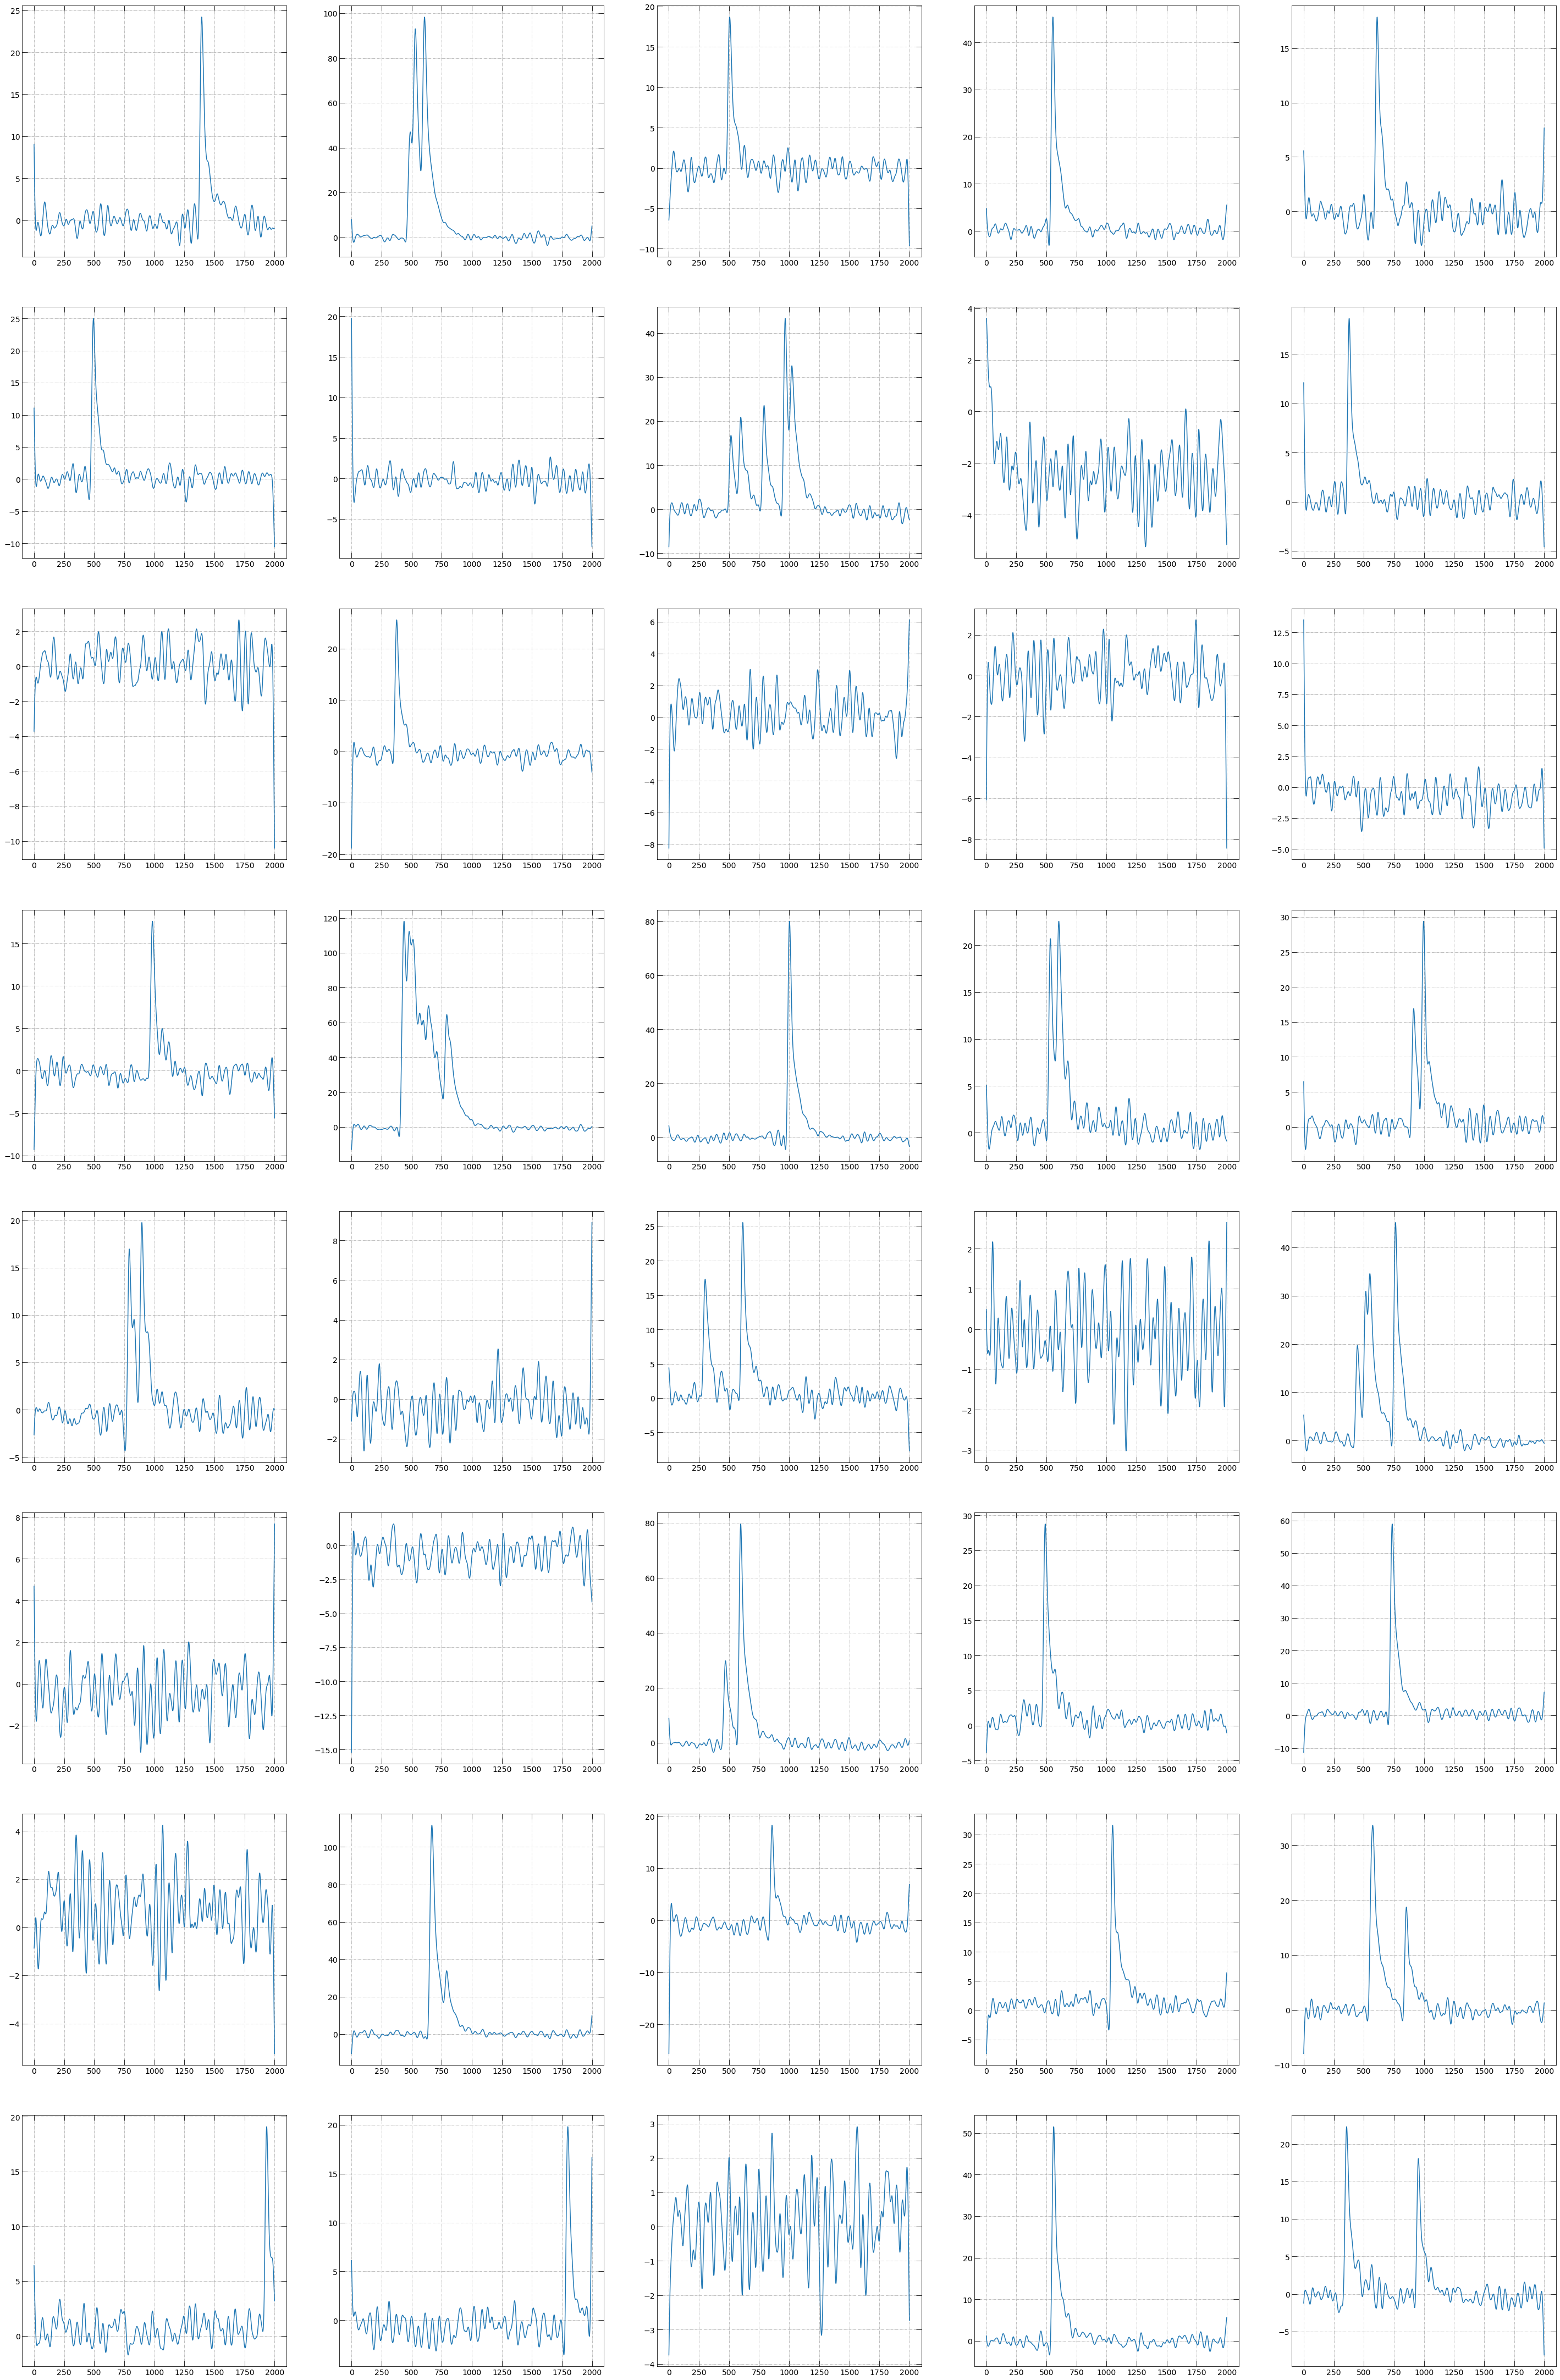

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

nrows, ncols = 20, 5

fig = plt.figure(figsize=(50,200))    
for i in range(1,41):
    ax = fig.add_subplot(nrows, ncols, i)
    data=mydata['Ch4'][i-1]

    b, a = signal.butter(3, 0.05)
    zi = signal.lfilter_zi(b, a)
    z, _ = signal.lfilter(b, a, data, zi=zi*data[0])
    z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
    y = signal.filtfilt(b, a, data)    

    ax.plot(y)

plt.show()

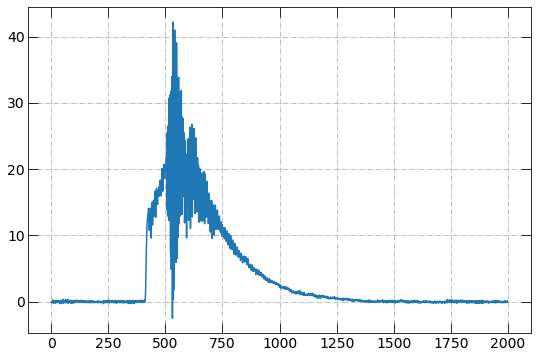

In [18]:
data=mydata['Ch4']

b, a = signal.butter(3, 0.05)
y = signal.filtfilt(b, a, data)

plt.plot(data.mean(axis=0))

plt.show()

In [19]:
from scipy import stats

linreg_array = np.array([])
arr=mydata['Ch4']

for row in arr[:,0:2000]:
    y = row
    #print(y.shape)
    x = np.arange(len(row))
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    print('_______________')
    print('inter:',intercept)
    print('r_val:',r_value)
    print('p_val:',p_value)
    print('err_:', std_err)
    
    print('_______________')
    trend=np.absolute(slope)
    mask=[trend < 0.001 ]
    
    linreg_array = np.append(linreg_array, mask, axis=0)
    linreg_array=linreg_array > 0
    #print(mask)
    #print(trend)
    #plt.plot(row)
eventSel=arr[linreg_array]
print(eventSel.shape)



_______________
inter: -0.39509202974261715
r_val: 0.05449235970585365
p_val: 0.014799041717920718
err_: 0.00037663635981450514
_______________
_______________
inter: 14.730224705828933
r_val: -0.22530094921339971
p_val: 1.9645945550152246e-24
err_: 0.0007985456415882052
_______________
_______________
inter: 1.0156290339679632
r_val: -0.040545105515218796
p_val: 0.06985587457651343
err_: 0.0003684030471757873
_______________
_______________
inter: 3.2633747065861174
r_val: -0.08013883968087057
p_val: 0.00033393005120624153
err_: 0.0004828153474315038
_______________
_______________
inter: 0.8369540987081344
r_val: -0.038954666804081065
p_val: 0.08156487677853304
err_: 0.00039970538311503886
_______________
_______________
inter: 1.7971157603016192
r_val: -0.05345995595728548
p_val: 0.016801770748744477
err_: 0.00039387614128250125
_______________
_______________
inter: -0.11504425060208193
r_val: -0.00268722663165369
p_val: 0.9044027335969329
err_: 0.0004351579544255701
______________

_______________
inter: 3.0913292747566463
r_val: -0.06935612735235146
p_val: 0.0019124703490101978
err_: 0.00047485286168854235
_______________
_______________
inter: 0.7671690215498908
r_val: 0.009014597394476126
p_val: 0.6870209093177169
err_: 0.00037824439939033685
_______________
_______________
inter: 2.1642391682947486
r_val: -0.07020227935406347
p_val: 0.0016811070141154365
err_: 0.0004491691143427054
_______________
_______________
inter: 0.8007105538140158
r_val: -0.029971400482961902
p_val: 0.1803023149273504
err_: 0.00039777005165724736
_______________
_______________
inter: 9.330049020944145
r_val: -0.16592691147679312
p_val: 8.163440350059846e-14
err_: 0.000687325652957077
_______________
_______________
inter: 17.612163812033316
r_val: -0.2751695410692303
p_val: 4.445671616350655e-36
err_: 0.0007637012500664001
_______________
_______________
inter: -0.15967684339638027
r_val: 0.007296392811081291
p_val: 0.7443449537025337
err_: 0.000372838402505563
_______________
______

_______________
inter: -0.8257825178320068
r_val: 0.07108539702874114
p_val: 0.0014673073514429576
err_: 0.00036336877697868206
_______________
_______________
inter: 18.109715778474303
r_val: -0.2832586310886693
p_val: 3.2354849543056925e-38
err_: 0.0007144227836740488
_______________
_______________
inter: -0.13185363378908105
r_val: 0.0067159343795320705
p_val: 0.7640540993822504
err_: 0.00043576629230632495
_______________
_______________
inter: 1.5458940681173785
r_val: -0.055230119373021774
p_val: 0.013499697378750822
err_: 0.0003742486333668144
_______________
_______________
inter: 5.464361637363089
r_val: -0.10924966309963383
p_val: 9.711104888991518e-07
err_: 0.00045757519717178915
_______________
_______________
inter: -0.8434197143852432
r_val: 0.0019713683701327923
p_val: 0.9297914404665205
err_: 0.0003903444347907633
_______________
_______________
inter: 261.3406243393454
r_val: -0.3386377141153552
p_val: 7.508820507454592e-55
err_: 0.008373321691378166
_______________
_

_______________
inter: -0.0476748898277789
r_val: 0.00728181336974569
p_val: 0.7448380086998343
err_: 0.0004035712627393012
_______________
_______________
inter: 2.5811407780958238
r_val: -0.04758755778280131
p_val: 0.03333248898091728
err_: 0.00043884231645338997
_______________
_______________
inter: -3.5892807989943742
r_val: -0.26583062025196597
p_val: 1.0662648328640335e-33
err_: 0.0005309214251402776
_______________
_______________
inter: 2.686158935683671
r_val: -0.09906777742142961
p_val: 9.05466556328228e-06
err_: 0.0003934370007960646
_______________
_______________
inter: 0.26196001998992924
r_val: 0.003496839451869086
p_val: 0.8758074930283871
err_: 0.00040244585503783256
_______________
_______________
inter: -0.601553723138355
r_val: 0.04484456002262464
p_val: 0.04493475790211196
err_: 0.0004757965122695715
_______________
_______________
inter: 1.1213008344313473
r_val: -0.036183559201607485
p_val: 0.10572812302080908
err_: 0.00038564457043726864
_______________
_______

_______________
inter: 0.17898647645874488
r_val: -0.00672396814129102
p_val: 0.7637802388607131
err_: 0.0003690619529363467
_______________
_______________
inter: 103.06492250844269
r_val: -0.33772890038339165
p_val: 1.5061164050515865e-54
err_: 0.003167524609983508
_______________
_______________
inter: -0.02570195205423001
r_val: 0.009609759144843919
p_val: 0.6675574059300531
err_: 0.0003851471936793304
_______________
_______________
inter: 6.413984038283808
r_val: -0.08516522749404445
p_val: 0.00013714953182904834
err_: 0.0006112613279619404
_______________
_______________
inter: 2.944779928217661
r_val: -0.07397502660402579
p_val: 0.000930521890420225
err_: 0.0004481694220493541
_______________
_______________
inter: -0.8200558357184494
r_val: 0.06834942253394437
p_val: 0.00222563160939353
err_: 0.00039792129199901825
_______________
_______________
inter: -0.1013524752774898
r_val: -0.012374145355055075
p_val: 0.5802197173298449
err_: 0.00040436926911130905
_______________
_____

_______________
inter: 0.3887909075766204
r_val: 0.008933712219123648
p_val: 0.6896825206583403
err_: 0.0004206018945259197
_______________
_______________
inter: 62.4849453606531
r_val: -0.3000335069692909
p_val: 6.9986685286588285e-43
err_: 0.0019665974838188258
_______________
_______________
inter: 0.36444762467261094
r_val: 0.004373247968326948
p_val: 0.845035778089899
err_: 0.00037771713166725513
_______________
_______________
inter: 4.691079763148683
r_val: -0.08163915929645825
p_val: 0.00025734882286977873
err_: 0.0004393240765520617
_______________
_______________
inter: 1.1072735601894965
r_val: -0.04411060099045789
p_val: 0.04856250162307782
err_: 0.00045418736086991625
_______________
_______________
inter: 1.2331576181605868
r_val: -0.015939800622797713
p_val: 0.4761866859089471
err_: 0.00040038155864220183
_______________
_______________
inter: 1.576389199339816
r_val: -0.04586263252078809
p_val: 0.04028290675292688
err_: 0.00046440652884600334
_______________
__________

_______________
inter: -6.858023927430232
r_val: -0.10587041499450471
p_val: 2.084554181556054e-06
err_: 0.00039527849211242296
_______________
_______________
inter: 0.06835292959571622
r_val: -0.0006587205645631684
p_val: 0.9765133001304127
err_: 0.00037976140780060784
_______________
_______________
inter: 0.4659131949176698
r_val: 0.020629154008588124
p_val: 0.3564841555825655
err_: 0.0003536479959209434
_______________
_______________
inter: 0.2703969076068623
r_val: 0.006565617692521884
p_val: 0.7691836042992793
err_: 0.00041458654240783907
_______________
_______________
inter: 3.683751730195416
r_val: -0.097690812832448
p_val: 1.2054140570752584e-05
err_: 0.00039073880929978584
_______________
_______________
inter: 0.2679605651720285
r_val: 0.0034095472971874177
p_val: 0.8788835188017496
err_: 0.00034321893390834145
_______________
_______________
inter: -0.11753789771785822
r_val: 0.0010297746921585098
p_val: 0.9632910052841157
err_: 0.0004403713200427457
_______________
____

_______________
inter: 45.550676570805436
r_val: -0.2479716192220961
p_val: 2.0913819339645824e-29
err_: 0.0015985013899644236
_______________
_______________
inter: -0.17792947465662023
r_val: 0.007276678914895598
p_val: 0.7450116732078977
err_: 0.00036356474208370636
_______________
_______________
inter: 1.797597246831047
r_val: -0.01754833942617205
p_val: 0.432831625745976
err_: 0.000453613486091202
_______________
_______________
inter: 7.0074517589689265
r_val: -0.17082894783702143
p_val: 1.4538723018758872e-14
err_: 0.0005343210834819194
_______________
_______________
inter: 7.99558248148664
r_val: -0.15869170433078825
p_val: 9.48737516783706e-13
err_: 0.0005393258467535902
_______________
_______________
inter: 2.040750776127141
r_val: -0.07447822588340679
p_val: 0.0008581760952489522
err_: 0.00034080481291809167
_______________
_______________
inter: -0.45080947405087163
r_val: -0.0007583862352450825
p_val: 0.9729609881800623
err_: 0.00044729060298781407
_______________
_____

_______________
inter: -0.29128154104770615
r_val: 0.002697495121479993
p_val: 0.9040391969446314
err_: 0.0003718347955956938
_______________
_______________
inter: 0.18644455045215688
r_val: 0.008438272542905042
p_val: 0.7060682217641827
err_: 0.0003749089107145483
_______________
_______________
inter: -0.19105438189989726
r_val: 0.006431200223112322
p_val: 0.7737791269688679
err_: 0.00046939889214250884
_______________
_______________
inter: 22.983253282449695
r_val: -0.29317500846402583
p_val: 6.171803631621152e-41
err_: 0.0008801708312081264
_______________
_______________
inter: 304.9916837187467
r_val: -0.3424073986066378
p_val: 4.081681185552657e-56
err_: 0.00895378288377002
_______________
_______________
inter: 7.8327837747793225
r_val: -0.1614995430042617
p_val: 3.7109071648309245e-13
err_: 0.0005854697287583253
_______________
_______________
inter: -1.0896740417670905
r_val: 0.12038907080509335
p_val: 6.654871356903173e-08
err_: 0.0004094773980320608
_______________
______

_______________
inter: 0.3998343555496082
r_val: 0.009319114820403216
p_val: 0.6770354056910874
err_: 0.0004069832548760252
_______________
_______________
inter: 3.486077461269441
r_val: -0.07769733980953145
p_val: 0.0005055156410442683
err_: 0.00039976967657741797
_______________
_______________
inter: 0.8248077022095613
r_val: 0.01690044970992507
p_val: 0.4500135019403547
err_: 0.000447191265671689
_______________
_______________
inter: 1.3789749670618545
r_val: -0.04705277323940133
p_val: 0.03536851647280322
err_: 0.0003795299787033774
_______________
_______________
inter: 4.0496004270590875
r_val: -0.11699099564446164
p_val: 1.5480462480551142e-07
err_: 0.00042341407975869243
_______________
_______________
inter: 7.999477019066186
r_val: -0.20887652855913327
p_val: 3.738100138234933e-21
err_: 0.0005647133987299089
_______________
_______________
inter: -0.8326217194433799
r_val: -0.005202006925194287
p_val: 0.8161520537611155
err_: 0.00033745677189740426
_______________
________

p_val: 0.943686507079673
err_: 0.00042009773554429466
_______________
_______________
inter: 1.4420577287115144
r_val: -0.04488974749830182
p_val: 0.0447190781366312
err_: 0.0004268700962831418
_______________
_______________
inter: 0.13616567473850083
r_val: 0.017040169832730944
p_val: 0.4462758297631194
err_: 0.00035057450459348693
_______________
_______________
inter: -0.5697910741599704
r_val: 0.06746447329215842
p_val: 0.002538984207780466
err_: 0.00036197268215266233
_______________
_______________
inter: -1.4326762527826862
r_val: 0.09115290134721821
p_val: 4.4566427971539724e-05
err_: 0.00039566017491525897
_______________
_______________
inter: 0.3720922569019577
r_val: 0.006521119722644653
p_val: 0.7707040320073287
err_: 0.0003589504050624668
_______________
_______________
inter: 8.773413883967095
r_val: -0.18131326933024394
p_val: 3.050283762839858e-16
err_: 0.0005655901615854764
_______________
_______________
inter: 2.0104783820210925
r_val: -0.017650737118991268
p_val: 

_______________
inter: 1.832557130525736
r_val: -0.019364621961549984
p_val: 0.3867359081318752
err_: 0.000419552042309666
_______________
_______________
inter: 0.09760540941654743
r_val: 0.002901034229743692
p_val: 0.8968375211064028
err_: 0.00037611677479234537
_______________
_______________
inter: -0.2475744249087256
r_val: 0.0012490663873407134
p_val: 0.9554811820102105
err_: 0.0003653413009669666
_______________
_______________
inter: -0.7293749337452301
r_val: 0.005070367292683795
p_val: 0.8207243611904382
err_: 0.0004495635138565068
_______________
_______________
inter: -0.329458195144939
r_val: -0.004450469626881446
p_val: 0.8423350187864993
err_: 0.0004262292617853603
_______________
_______________
inter: 0.0639640028470636
r_val: 0.0053807965465488975
p_val: 0.8099520915192312
err_: 0.00037580823383341025
_______________
_______________
inter: 4.076408189844412
r_val: -0.14931932309640508
p_val: 1.929707327913961e-11
err_: 0.00044746435382286544
_______________
__________

_______________
inter: 0.41411124740655386
r_val: -0.009346022731972051
p_val: 0.6761557519324419
err_: 0.0003682589921567778
_______________
_______________
inter: -0.4502715006133091
r_val: 0.008301691755992421
p_val: 0.7106098029762025
err_: 0.00041532045350660006
_______________
_______________
inter: -0.07594393712243744
r_val: 0.008924533994994753
p_val: 0.6899847829871242
err_: 0.0003684881317039707
_______________
_______________
inter: 0.3742911574515314
r_val: 0.010780394733176914
p_val: 0.6299292017040163
err_: 0.00036861537943379133
_______________
_______________
inter: -0.5530127814881518
r_val: -0.0038265448282901273
p_val: 0.864206524160805
err_: 0.00042973613938707437
_______________
_______________
inter: -0.7811984159434653
r_val: 0.05046467034781648
p_val: 0.024015839935254826
err_: 0.0004877911617748865
_______________
_______________
inter: 0.3023423439794472
r_val: -0.002154052446361425
p_val: 0.923304516205361
err_: 0.00041893956039852094
_______________
_______

_______________
inter: 2.8454455348083143
r_val: 0.003530103461858057
p_val: 0.8746358169190371
err_: 0.00048072470236562484
_______________
_______________
inter: -0.6555597958595588
r_val: -0.024154481689683448
p_val: 0.2802742586529312
err_: 0.0003295484895953875
_______________
_______________
inter: 4.373156134054152
r_val: -0.11871353155365034
p_val: 1.012035399229015e-07
err_: 0.0005004160107690853
_______________
_______________
inter: 3.0158403071190585
r_val: -0.08850192073418027
p_val: 7.3942319882276e-05
err_: 0.00040335304977116095
_______________
_______________
inter: -0.1217869852952495
r_val: -0.002055957969178749
p_val: 0.9267871446266781
err_: 0.00038297574639302836
_______________
_______________
inter: -1.1827195493162648
r_val: 0.05195937228368111
p_val: 0.02013563728127497
err_: 0.00041616122659387974
_______________
_______________
inter: -0.1940395711234395
r_val: -0.0009644071138821284
p_val: 0.9656197120010045
err_: 0.0004048897020086215
_______________
_____

_______________
inter: 2.9187729317160636
r_val: -0.09069388350487227
p_val: 4.8697667409201985e-05
err_: 0.0003902776190896175
_______________
_______________
inter: 2.8004893310919425
r_val: -0.030555997432853126
p_val: 0.17194826139664524
err_: 0.00040797021709886423
_______________
_______________
inter: 0.6458006602759134
r_val: 0.06688062817230826
p_val: 0.002767266229408868
err_: 0.0004618037508564005
_______________
_______________
inter: 8.351490179152858
r_val: -0.16468554576706324
p_val: 1.2533954142969945e-13
err_: 0.0005820738822030476
_______________
_______________
inter: -0.18343410113135605
r_val: 0.013107744355143208
p_val: 0.5579730693402241
err_: 0.0003868632541520471
_______________
_______________
inter: 0.2171148365212251
r_val: -0.00021780978526026227
p_val: 0.9922329876608009
err_: 0.0004410234922363686
_______________
_______________
inter: -0.45885881301777254
r_val: -0.005045999704453721
p_val: 0.8215714063213572
err_: 0.00034323167294526906
_______________


_______________
inter: -0.13973520815341173
r_val: 0.0008377360671333512
p_val: 0.9701331588384989
err_: 0.000439313048800143
_______________
_______________
inter: 1.2524153680735277
r_val: -0.03964698725435734
p_val: 0.0762857863920646
err_: 0.0003968299727792597
_______________
_______________
inter: -0.4263470386018032
r_val: 0.005927771163430403
p_val: 0.7910598595684808
err_: 0.000373160179633831
_______________
_______________
inter: -0.33207750670126385
r_val: -0.004112201096968625
p_val: 0.8541789637203246
err_: 0.00031115087336673126
_______________
_______________
inter: 37.306569003377206
r_val: -0.2658722028679909
p_val: 1.041060783262651e-33
err_: 0.0013815064293369414
_______________
_______________
inter: -0.24769430436294715
r_val: 0.05183610544801702
p_val: 0.020433542839257045
err_: 0.00044729783576416104
_______________
_______________
inter: 0.194056547483898
r_val: 0.09739246156800288
p_val: 1.2818772870679282e-05
err_: 0.00042110928329560477
_______________
_____

_______________
inter: 6.368025578120017
r_val: -0.11948816996772625
p_val: 8.34323413605777e-08
err_: 0.0005450910602131096
_______________
_______________
inter: 0.24118804234236868
r_val: 0.0120043278864768
p_val: 0.5915898437035604
err_: 0.0003857031741578691
_______________
_______________
inter: -1.196031575121517
r_val: 0.07242764674502798
p_val: 0.0011898785452353537
err_: 0.0004082118585519336
_______________
_______________
inter: -1.2405892205412419
r_val: 0.1497606587184347
p_val: 1.6814520118948662e-11
err_: 0.00038160942946911737
_______________
_______________
inter: 0.1401843017885157
r_val: 0.003698632087664098
p_val: 0.8687039147536143
err_: 0.00039016497127259764
_______________
_______________
inter: 0.2820341495919211
r_val: 0.010981355748787384
p_val: 0.6235615933799319
err_: 0.0003908033267288422
_______________
_______________
inter: 5.502962155286049
r_val: -0.13585921717861754
p_val: 1.0586020259525178e-09
err_: 0.0004893576323680873
_______________
__________

_______________
inter: 4.748046779640437
r_val: -0.0885244212730045
p_val: 7.362950001846475e-05
err_: 0.00044847762105213574
_______________
_______________
inter: 0.5123463874123452
r_val: 0.002024187397393599
p_val: 0.9279153926457471
err_: 0.00041379629742522434
_______________
_______________
inter: 0.7917605742582566
r_val: 0.001976424813307391
p_val: 0.9296118266067432
err_: 0.0003680286292783896
_______________
_______________
inter: 4.396844926021936
r_val: -0.15382279671683569
p_val: 4.643692740983492e-12
err_: 0.0003965597037589232
_______________
_______________
inter: -0.12775324458973208
r_val: 0.010522871623201625
p_val: 0.6381293121214736
err_: 0.0003677200787826101
_______________
_______________
inter: 9.988233292444777
r_val: -0.19372414676727365
p_val: 2.3080649671107948e-18
err_: 0.0005840146768270138
_______________
_______________
inter: 0.1946351975528121
r_val: 0.0030825574386110902
p_val: 0.890421956107651
err_: 0.00037920256327090185
_______________
_________

_______________
inter: -0.4066621992034999
r_val: -0.013891060192645376
p_val: 0.5346860347717886
err_: 0.0003454166386946517
_______________
_______________
inter: 0.3343001832416621
r_val: -0.011642207815846116
p_val: 0.6028214002439785
err_: 0.00040386402716252275
_______________
_______________
inter: 0.2443390577438207
r_val: -0.12276105541153229
p_val: 3.6406554753562114e-08
err_: 0.0003405429695364395
_______________
_______________
inter: 4.637985007496251
r_val: -0.00035082335756325944
p_val: 0.9874900901040999
err_: 0.00047755475296976113
_______________
_______________
inter: 0.2916868535428956
r_val: 0.012260500186756867
p_val: 0.5837028602169754
err_: 0.00041403511892483096
_______________
_______________
inter: 0.9549840534277491
r_val: -0.027588554981771166
p_val: 0.21747837695224892
err_: 0.00045787484038552103
_______________
_______________
inter: -0.13770769160873428
r_val: 0.007073115349385993
p_val: 0.7519072277487863
err_: 0.0004197067535355931
_______________
___

_______________
inter: 3.0187406751169803
r_val: -0.0461149866727429
p_val: 0.039195110443681326
err_: 0.0004286949578613584
_______________
_______________
inter: -0.05762811018734215
r_val: -0.011114085058431545
p_val: 0.6193712845121526
err_: 0.00042272389110878286
_______________
_______________
inter: 10.715995017642769
r_val: -0.21407164201587753
p_val: 3.666625919449702e-22
err_: 0.0005837146036849755
_______________
_______________
inter: -0.5489408931898652
r_val: 0.04338865950081703
p_val: 0.05236749189474643
err_: 0.0004355033749567845
_______________
_______________
inter: -0.0688518770917112
r_val: 0.013502448645765533
p_val: 0.5461775409336002
err_: 0.00037545804123009487
_______________
_______________
inter: 0.062320794148387176
r_val: -0.00024086083795456248
p_val: 0.9914110262844119
err_: 0.0004085690275721086
_______________
_______________
inter: 12.64568218920842
r_val: -0.20908113288393865
p_val: 3.415377312880378e-21
err_: 0.0006374785236435992
_______________
__

_______________
inter: 0.06452582799515535
r_val: -0.00015649844791455612
p_val: 0.9944192835302773
err_: 0.0003872588322927002
_______________
_______________
inter: -0.09042054730221902
r_val: 0.002387840851665982
p_val: 0.9150104173402483
err_: 0.00037799214875932355
_______________
_______________
inter: 20.156325110172215
r_val: -0.24164603857495778
p_val: 5.765962376739468e-28
err_: 0.0010326322862365357
_______________
_______________
inter: 4.540308921296915
r_val: -0.12638704044856555
p_val: 1.416167509407213e-08
err_: 0.00047509784583549204
_______________
_______________
inter: 3.108800993442613
r_val: -0.05135412709482432
p_val: 0.02163554395871047
err_: 0.0005490259809385267
_______________
_______________
inter: -0.8124357518211395
r_val: -0.006689595607359918
p_val: 0.7649521606728349
err_: 0.00044448988075778214
_______________
_______________
inter: -0.40563872609149276
r_val: -0.00741173940160723
p_val: 0.7404478093062333
err_: 0.00037276305161382516
_______________
_

_______________
inter: 13.69736661972055
r_val: -0.2058578284408737
p_val: 1.4009312458359636e-20
err_: 0.0006919520904331209
_______________
_______________
inter: -0.27843678160911955
r_val: 0.012938220279001508
p_val: 0.563076940858038
err_: 0.00038939530742555946
_______________
_______________
inter: 2.056612178759032
r_val: -0.055360941065145094
p_val: 0.0132801162055525
err_: 0.00037865069270774746
_______________
_______________
inter: 2.32159518725486
r_val: -0.08030709943536506
p_val: 0.0003243855869798937
err_: 0.0003902752980072242
_______________
_______________
inter: 0.3252444686747398
r_val: -0.0003440206080469061
p_val: 0.9877326481165712
err_: 0.00033136351446659074
_______________
_______________
inter: 0.4721040994653199
r_val: 0.00980599165226254
p_val: 0.6611879245569581
err_: 0.0003883604489139577
_______________
_______________
inter: 1899.788213438735
r_val: -0.3503986326671421
p_val: 7.435303802302185e-59
err_: 0.056737953155699586
_______________
____________

_______________
inter: 1.8786043341965173
r_val: -0.04398472721786642
p_val: 0.049208709168015334
err_: 0.0004610472771405816
_______________
_______________
inter: 0.13189836899727106
r_val: 0.006839310886418307
p_val: 0.7598516252323101
err_: 0.00032278586301792526
_______________
_______________
inter: 4.0216857783228654
r_val: -0.117166175515596
p_val: 1.482963941613435e-07
err_: 0.0004196283161174343
_______________
_______________
inter: 0.0799370769160804
r_val: 0.008669132738993298
p_val: 0.698415467758674
err_: 0.0003850505814882704
_______________
_______________
inter: 0.1030543516120152
r_val: -0.0073884169890942285
p_val: 0.741235256362869
err_: 0.00038551008540643365
_______________
_______________
inter: 0.300283312889017
r_val: -0.007839210710727632
p_val: 0.7260637629754454
err_: 0.0003921851272259858
_______________
_______________
inter: 1.684639377280951
r_val: -0.023963634155587
p_val: 0.2840929458687531
err_: 0.0003966777994357502
_______________
_______________
i

_______________
inter: 1.0981431405508286
r_val: -0.05972411529826183
p_val: 0.007547734390089295
err_: 0.00041941796667559694
_______________
_______________
inter: 0.23546496448742335
r_val: 0.006345145494405529
p_val: 0.7767253798855355
err_: 0.00039871520881653476
_______________
_______________
inter: -0.13298000999507836
r_val: 0.0076390050168820426
p_val: 0.7327888562923512
err_: 0.00043163045352644834
_______________
_______________
inter: -0.13586337134466048
r_val: 0.0015297560641749834
p_val: 0.9454910700746876
err_: 0.00037103703456639207
_______________
_______________
inter: 0.2954212136356179
r_val: 0.01856622802345491
p_val: 0.40661828644383224
err_: 0.0003786303164736532
_______________
_______________
inter: 0.03305133796732475
r_val: -0.005208505899490202
p_val: 0.8159264820785789
err_: 0.0003585932998947625
_______________
_______________
inter: 1.2482542819500235
r_val: 0.03137048941129836
p_val: 0.16079613375251678
err_: 0.0004430557366722838
_______________
_____

_______________
inter: -0.9089488891917883
r_val: 0.08736392185103506
p_val: 9.150745274688998e-05
err_: 0.00042971664584093717
_______________
_______________
inter: 6.5965390335136505
r_val: -0.14347190883958313
p_val: 1.1512899997357481e-10
err_: 0.0004963627614421155
_______________
_______________
inter: 0.16975560704496467
r_val: -0.0002939004211988007
p_val: 0.9895197608860793
err_: 0.00037679691495864736
_______________
_______________
inter: 3.906654097193763
r_val: -0.1504280011551638
p_val: 1.3643110771026485e-11
err_: 0.0003771389676938916
_______________
_______________
inter: 0.5392114548786122
r_val: -0.015916919385891376
p_val: 0.47682009364826894
err_: 0.00037041909649009
_______________
_______________
inter: 7.148628609937391
r_val: -0.1684442153052226
p_val: 3.387367523716226e-14
err_: 0.0004771368864487399
_______________
_______________
inter: 1.4873886693016578
r_val: -0.034080768397571286
p_val: 0.12760165749704772
err_: 0.0003979539588301016
_______________
___

_______________
inter: 4.020974119001165
r_val: -0.03787159304726429
p_val: 0.09041403882163505
err_: 0.0004946071310624853
_______________
_______________
inter: -0.3801595565852476
r_val: 0.0702315312432865
p_val: 0.001673589344977511
err_: 0.00039408944217656595
_______________
_______________
inter: -4.119476352732787
r_val: 0.08885262762244091
p_val: 6.920634857770628e-05
err_: 0.0007643292844854499
_______________
_______________
inter: 0.40178385049903187
r_val: -0.003685439290253945
p_val: 0.8691680154560038
err_: 0.00035860904349543926
_______________
_______________
inter: -0.18975628852230428
r_val: -0.0021797447460132043
p_val: 0.9223926076649693
err_: 0.0004640207556299919
_______________
_______________
inter: -1.2350938318720373
r_val: 0.1036477534257314
p_val: 3.4026554343701606e-06
err_: 0.0004332234850215926
_______________
_______________
inter: -0.40509260521259804
r_val: -0.007829736637306111
p_val: 0.726381535358445
err_: 0.0004373521568809569
_______________
____

_______________
inter: 10.297844395983779
r_val: -0.21566151808302855
p_val: 1.7797072083195814e-22
err_: 0.0005812995203507776
_______________
_______________
inter: -0.1308556782215551
r_val: 0.00860703402118405
p_val: 0.7004709988671133
err_: 0.0003675632446604971
_______________
_______________
inter: -1.092679826753189
r_val: 0.13754337572294556
p_val: 6.547266428367392e-10
err_: 0.0004060702210083842
_______________
_______________
inter: 0.11784092802086096
r_val: -0.007229595838557955
p_val: 0.7466047838982275
err_: 0.00038160730207729694
_______________
_______________
inter: 1.458212969272928
r_val: -0.014370684457510247
p_val: 0.520673270679038
err_: 0.00043879965891028687
_______________
_______________
inter: -0.526639665016055
r_val: 0.004946146262302957
p_val: 0.8250445871267535
err_: 0.00040802312928320695
_______________
_______________
inter: 0.09401309951091022
r_val: 0.007646025446662317
p_val: 0.7325526829560581
err_: 0.00043616273142185134
_______________
________

_______________
inter: -0.846530280314457
r_val: 0.062010392688099304
p_val: 0.0055350361493622015
err_: 0.0003699125775823651
_______________
_______________
inter: 0.12147579240674652
r_val: 0.0006005988280791637
p_val: 0.9785851108723918
err_: 0.00036304073272927376
_______________
_______________
inter: 21.741093271546
r_val: -0.2843735653800446
p_val: 1.620392280767814e-38
err_: 0.0008135433242556175
_______________
_______________
inter: -19.07389125134392
r_val: -0.11326874821165939
p_val: 3.7999153973844134e-07
err_: 0.0004986873192059166
_______________
_______________
inter: -1.5930150076476886
r_val: 0.1732667077923867
p_val: 6.046886323593916e-15
err_: 0.0004289929976650828
_______________
_______________
inter: 41.38391157451577
r_val: -0.32397220277775823
p_val: 4.273908783807553e-50
err_: 0.001415474966492571
_______________
_______________
inter: 0.05426612451361329
r_val: -0.006212544726144901
p_val: 0.7812715035286798
err_: 0.00034288017234714735
_______________
_____

_______________
inter: -0.00033269728774065754
r_val: 0.06928442139995426
p_val: 0.001933362274030658
err_: 0.0003519536428547815
_______________
_______________
inter: 3.670949555525187
r_val: -0.1343335519620821
p_val: 1.6276886243676812e-09
err_: 0.0004747375610383073
_______________
_______________
inter: -0.11216241879052896
r_val: 0.005178383725406216
p_val: 0.81697211507917
err_: 0.0003990781416837081
_______________
_______________
inter: 1.2887303620916462
r_val: -0.023936314285076952
p_val: 0.28464245780747727
err_: 0.0004453129617043498
_______________
_______________
inter: 9.769983508245877
r_val: -0.1963984647749325
p_val: 7.706986288379126e-19
err_: 0.0005470045090889638
_______________
_______________
inter: -2.0523591689004967
r_val: 0.15496865422573697
p_val: 3.209973199436951e-12
err_: 0.0004113232423179509
_______________
_______________
inter: -1.912027183377978
r_val: 0.12590204284546722
p_val: 1.6093041816053905e-08
err_: 0.0004651733382369696
_______________
___

_______________
inter: -0.3913503096937162
r_val: 0.00862041512580136
p_val: 0.7000278846815332
err_: 0.000383947240868816
_______________
_______________
inter: 0.8768455317795716
r_val: -0.005836597531468165
p_val: 0.7942007703678189
err_: 0.00034867266474311614
_______________
_______________
inter: 0.18027265155304362
r_val: 0.03211725070667749
p_val: 0.15105938961238644
err_: 0.0003611932753606467
_______________
_______________
inter: 6.1302218890554725
r_val: -0.15611083028534703
p_val: 2.215423499251929e-12
err_: 0.0005241013958702888
_______________
_______________
inter: 0.8441967652536819
r_val: -0.03224757010502199
p_val: 0.14940720682879402
err_: 0.00041179742379562553
_______________
_______________
inter: 6.7220284251813585
r_val: -0.16501026622951312
p_val: 1.1207673841339266e-13
err_: 0.0004717726020108171
_______________
_______________
inter: -0.1928662789817648
r_val: -0.0022953821156535634
p_val: 0.9182895166186398
err_: 0.00036555015995424193
_______________
_____

p_val: 0.4053280717539669
err_: 0.00036911794155505796
_______________
_______________
inter: -0.22867449608531604
r_val: -0.01498855266372141
p_val: 0.502904314549595
err_: 0.00042438208234110405
_______________
_______________
inter: 0.48509961685813624
r_val: 0.009712410842825845
p_val: 0.6642224283497371
err_: 0.00043864482458478844
_______________
_______________
inter: -0.3099487983281432
r_val: -0.021771139194343675
p_val: 0.33048294071592055
err_: 0.0004313658691142307
_______________
_______________
inter: 2.1308040373751855
r_val: -0.028501937773912165
p_val: 0.20262537207852765
err_: 0.0003487262791892458
_______________
_______________
inter: -0.7431576938802912
r_val: 0.06399055466710063
p_val: 0.0041979645752084176
err_: 0.0003754957506856385
_______________
_______________
inter: 1.487213575030563
r_val: -0.045846562164358166
p_val: 0.04035303761033658
err_: 0.00037142379301679645
_______________
_______________
inter: -0.17336353035592622
r_val: 0.006513272137441282
p_v

r_val: -0.013929488214958777
p_val: 0.5335563499597813
err_: 0.00038449561463226847
_______________
_______________
inter: 5.068278360819665
r_val: -0.13185234981112778
p_val: 3.2432419607431375e-09
err_: 0.00048490730755891586
_______________
_______________
inter: 0.33018792119084156
r_val: 0.010221656407547932
p_val: 0.6477770535368785
err_: 0.0004069194531938703
_______________
_______________
inter: -0.6099998334166501
r_val: 0.008413131990278929
p_val: 0.7069034154464521
err_: 0.0004472417879521544
_______________
_______________
inter: -0.8068667635878731
r_val: 0.007420649642273402
p_val: 0.7401470397742367
err_: 0.0004158541735770936
_______________
_______________
inter: 2.2047212000060488
r_val: -0.053834928955359275
p_val: 0.01604843496525665
err_: 0.00042241530533173026
_______________
_______________
inter: 1.711529856283885
r_val: -0.04547687604603299
p_val: 0.041995135663489724
err_: 0.0004366878012301946
_______________
_______________
inter: 0.13165106840513172
r_val:

_______________
inter: 0.15702532067302216
r_val: -0.00554137024306483
p_val: 0.8043939378310141
err_: 0.0004307261387630007
_______________
_______________
inter: 1.0243345297048145
r_val: -0.026182095309495723
p_val: 0.24185311003874851
err_: 0.00042417499485452383
_______________
_______________
inter: 30.395093014099004
r_val: -0.2808029543737691
p_val: 1.467474889619425e-37
err_: 0.0012823812518036968
_______________
_______________
inter: 0.6827663743885242
r_val: -0.004558924881335234
p_val: 0.8385450262398582
err_: 0.0004271598964792045
_______________
_______________
inter: 1.9243721321157121
r_val: -0.029779774860854483
p_val: 0.1831052351042721
err_: 0.00040332183800295365
_______________
_______________
inter: 1.9303011675980468
r_val: -0.07388613795737786
p_val: 0.0009438738638460921
err_: 0.0004028976716259328
_______________
_______________
inter: -0.6924825920373401
r_val: -0.00907018432026147
p_val: 0.6851940059319755
err_: 0.00038225621374542195
_______________
______

_______________
inter: 17.545860751442433
r_val: -0.12798059875314194
p_val: 9.272794488356128e-09
err_: 0.0010899204957839103
_______________
_______________
inter: 9.303229249011878
r_val: -0.19516662100053303
p_val: 1.279859961767439e-18
err_: 0.0005671831187795555
_______________
_______________
inter: 0.012440794754135774
r_val: -0.00018037479286993723
p_val: 0.9935678730538442
err_: 0.00040315930193110815
_______________
_______________
inter: 5.9354654793814134
r_val: -0.153835393192243
p_val: 4.6249510865835984e-12
err_: 0.0005166947038030878
_______________
_______________
inter: -0.5982985779837009
r_val: 0.01865686008058372
p_val: 0.4043310819792897
err_: 0.0003555596770694294
_______________
_______________
inter: 13.209030999651763
r_val: -0.24580719150929278
p_val: 6.576079842264591e-29
err_: 0.0006350862209232399
_______________
_______________
inter: -9.991078036739195
r_val: -0.15314938693070243
p_val: 5.761637021824575e-12
err_: 0.0003857491838696824
_______________
_

_______________
inter: 0.07881224539250803
r_val: -0.001269881637701217
p_val: 0.9547400807489081
err_: 0.00042701635888851
_______________
_______________
inter: 0.43729261127008323
r_val: 0.042022020273757246
p_val: 0.06025310537247218
err_: 0.0004318483054979677
_______________
_______________
inter: 3.97912622476636
r_val: -0.2125133382583833
p_val: 7.405043788427765e-22
err_: 0.000459636895145324
_______________
_______________
inter: 0.2991834082957764
r_val: -0.008304701618987808
p_val: 0.7105096076541538
err_: 0.0004079088144425847
_______________
_______________
inter: 0.784965820120197
r_val: -0.009015319114246847
p_val: 0.6869971777548689
err_: 0.00039382112757078085
_______________
_______________
inter: 0.3644226977420517
r_val: 0.044451134804863075
p_val: 0.04684987685380093
err_: 0.0004693039592658365
_______________
_______________
inter: 0.9366697105993147
r_val: -0.03783040492109677
p_val: 0.09076522861993848
err_: 0.00039017870674527095
_______________
______________

_______________
inter: 0.31349139066835735
r_val: -0.0006387899345545794
p_val: 0.97722373137467
err_: 0.0003888521938398185
_______________
_______________
inter: 1.3435125770448362
r_val: -0.038395396288320574
p_val: 0.08604244547739102
err_: 0.00047046681764385264
_______________
_______________
inter: 19.013353414202047
r_val: -0.2304278096021494
p_val: 1.638556859300918e-25
err_: 0.0008398871044522899
_______________
_______________
inter: -0.31439318219672296
r_val: 0.008119845240589311
p_val: 0.7166725057178163
err_: 0.0004247628321841013
_______________
_______________
inter: 4.426811972801572
r_val: -0.1142196513972264
p_val: 3.028998149444794e-07
err_: 0.00046153018855761704
_______________
_______________
inter: 0.9674640861388523
r_val: -0.020856459446875468
p_val: 0.3512086350054324
err_: 0.0004620179784605622
_______________
_______________
inter: -1.2555896142837053
r_val: 0.07632797537597451
p_val: 0.0006346863607256733
err_: 0.00040098999814828314
_______________
_____

_______________
inter: 1.194099525994491
r_val: 0.0997940019710099
p_val: 7.774608175013607e-06
err_: 0.0005522847426234152
_______________
_______________
inter: 5.245168658095083
r_val: -0.12732526045405893
p_val: 1.1043653099057528e-08
err_: 0.0004675148232512358
_______________
_______________
inter: 3.4427977223509267
r_val: -0.09098362582514927
p_val: 4.6049692528140735e-05
err_: 0.0003862935309967811
_______________
_______________
inter: -0.4398256023504135
r_val: -0.0021656394279265063
p_val: 0.9228932416274016
err_: 0.00037758734676858875
_______________
_______________
inter: 1.3371732467100794
r_val: -0.0413725188473615
p_val: 0.0643322038205416
err_: 0.00033952872026742396
_______________
_______________
inter: 0.678286780851934
r_val: -0.03694507054518174
p_val: 0.09858252177040205
err_: 0.00045977400859066104
_______________
_______________
inter: 9.04346722093507
r_val: -0.1861834554506191
p_val: 4.671920403114246e-17
err_: 0.0005358885787269137
_______________
________

_______________
inter: 2.261394984325915
r_val: -0.09761800368920169
p_val: 1.2236623710871212e-05
err_: 0.0003876520038244406
_______________
_______________
inter: 0.018318280253745822
r_val: -0.01588070422630888
p_val: 0.47782355804761445
err_: 0.00044498144253703566
_______________
_______________
inter: 8.839928020838068
r_val: -0.18640884641143074
p_val: 4.277983220386675e-17
err_: 0.0005909871210410663
_______________
_______________
inter: -0.010368770160381215
r_val: -0.0034217174803870174
p_val: 0.8784545517255075
err_: 0.00032743442098841116
_______________
_______________
inter: -0.44681103387701016
r_val: 0.010808988446022417
p_val: 0.6290214941760868
err_: 0.00039669459328440815
_______________
_______________
inter: 0.45616658337495386
r_val: -0.006644543069697042
p_val: 0.7664890285225748
err_: 0.0003572546034962054
_______________
_______________
inter: -0.35128155619164714
r_val: 0.09140278316686741
p_val: 4.245937234312206e-05
err_: 0.0003560629626468773
____________

_______________
inter: 2.665667787318368
r_val: -0.08011542506353969
p_val: 0.00033527885912416574
err_: 0.0004416245804724821
_______________
_______________
inter: 0.21123913800686667
r_val: -0.0016393790297380354
p_val: 0.9415916833719808
err_: 0.0004252089862979453
_______________
_______________
inter: 5.542018960216941
r_val: -0.13775981363209278
p_val: 6.152589346120406e-10
err_: 0.0004479859613720718
_______________
_______________
inter: 10.919970317871321
r_val: -0.21050913314866246
p_val: 1.8139255447365834e-21
err_: 0.0006194255396031281
_______________
_______________
inter: 0.6364761861494361
r_val: 0.05523150070661245
p_val: 0.013497362197167904
err_: 0.0004124219457887232
_______________
_______________
inter: -0.014405373070952888
r_val: -0.0027759405392671437
p_val: 0.9012626525982352
err_: 0.00037403231111188257
_______________
_______________
inter: 0.09607047991155704
r_val: 0.009308803260061952
p_val: 0.677372620463701
err_: 0.0003621542479695486
_______________
_

_______________
inter: -0.9567121136401542
r_val: -0.018071718057824707
p_val: 0.4192330771119126
err_: 0.0003583881897442607
_______________
_______________
inter: 9.600544031014826
r_val: -0.1001122118873345
p_val: 7.269950327586823e-06
err_: 0.0006811704348384164
_______________
_______________
inter: 0.8368627050110343
r_val: -0.01297784849166549
p_val: 0.5618818388580469
err_: 0.0004083811910220763
_______________
_______________
inter: 1.3160300607272006
r_val: 0.006567249475098644
p_val: 0.7691278655946303
err_: 0.000425786319961616
_______________
_______________
inter: -1.5475043993153947
r_val: -0.022287913556419937
p_val: 0.3191304420731449
err_: 0.00037123433046802866
_______________
_______________
inter: 0.6080806869293043
r_val: -0.017639605519811436
p_val: 0.4304421315556922
err_: 0.0004555122723284069
_______________
_______________
inter: 2.3380104796086827
r_val: -0.04231621091958175
p_val: 0.058477275182153954
err_: 0.0004199794346356194
_______________
____________

_______________
inter: 1.4127717202005654
r_val: -0.03798385670680088
p_val: 0.08946236932745129
err_: 0.00040234064334491055
_______________
_______________
inter: 2.3019517665410114
r_val: -0.046449059023778196
p_val: 0.03779348455261055
err_: 0.0004475309640493979
_______________
_______________
inter: -0.7406304574986338
r_val: 0.003680998858396997
p_val: 0.8693242326135245
err_: 0.0004307697477467018
_______________
_______________
inter: 2.574239380309921
r_val: -0.042881738071404926
p_val: 0.05518552636986275
err_: 0.00042635739594615015
_______________
_______________
inter: -0.13633599866730772
r_val: -0.008373428800970271
p_val: 0.7082231120862117
err_: 0.00033753488589990976
_______________
_______________
inter: 4.867113518998142
r_val: -0.1486336610078694
p_val: 2.3881198636847587e-11
err_: 0.00044504374346506035
_______________
_______________
inter: 2.2041868156831566
r_val: -0.07642582642187555
p_val: 0.0006245241239803358
err_: 0.0003910601044751098
_______________
___

_______________
inter: 6.897060500052923
r_val: -0.16559574169186794
p_val: 9.155693003813624e-14
err_: 0.0004815946520866773
_______________
_______________
inter: -0.08648162282489613
r_val: -0.0026794043535900095
p_val: 0.9046796801432304
err_: 0.0004103715408605292
_______________
_______________
inter: -0.15421851195620043
r_val: -0.000978190325408448
p_val: 0.9651286628401318
err_: 0.000388618342426474
_______________
_______________
inter: 8.953790104947528
r_val: -0.1738558715698868
p_val: 4.8822213709750885e-15
err_: 0.000561437555806515
_______________
_______________
inter: 3.694194993412371
r_val: -0.11642320241203316
p_val: 1.7785170188985949e-07
err_: 0.0004598125502873456
_______________
_______________
inter: -0.6276192661245019
r_val: 0.09690638142029746
p_val: 1.4164454068480365e-05
err_: 0.00041843474408379845
_______________
_______________
inter: 7.753370981175978
r_val: -0.1184317421858868
p_val: 1.0853526668066656e-07
err_: 0.0006457426275366024
_______________
_

_______________
inter: -0.903594520921461
r_val: -0.0075616701271273125
p_val: 0.7353921376907593
err_: 0.00037523451181941655
_______________
_______________
inter: 0.5490223978919769
r_val: -0.0202524438547648
p_val: 0.3653364402331113
err_: 0.00045599486817717846
_______________
_______________
inter: -0.05589811155027631
r_val: -0.003983333776288278
p_val: 0.8586998563270171
err_: 0.00040946378206010926
_______________
_______________
inter: 7.35502086835372
r_val: -0.2025484008887259
p_val: 5.82391633642515e-20
err_: 0.0004779449237170754
_______________
_______________
inter: 7.34359128011743
r_val: -0.10485671637795556
p_val: 2.6097455563825877e-06
err_: 0.000576952016540577
_______________
_______________
inter: 6.2984494419457455
r_val: -0.16426907022258044
p_val: 1.4462474567364596e-13
err_: 0.0004945755548073511
_______________
_______________
inter: 0.0914495328093896
r_val: 0.003905635082591746
p_val: 0.8614279122001731
err_: 0.00038385576886034264
_______________
________

_______________
inter: 4.996640285917631
r_val: -0.11392342060174361
p_val: 3.2513317583712825e-07
err_: 0.0004692102616764011
_______________
_______________
inter: 0.7752705465448069
r_val: -0.04731476180508335
p_val: 0.03435819601007777
err_: 0.00040762686189106147
_______________
_______________
inter: -0.6468510441749626
r_val: 0.016596021241453318
p_val: 0.4582183919312989
err_: 0.0003587968804441091
_______________
_______________
inter: 9.136121848166765
r_val: -0.19731859902793905
p_val: 5.264919565502427e-19
err_: 0.0005440682863010136
_______________
_______________
inter: 1.488577196250362
r_val: -0.03671827357686933
p_val: 0.1006691796577374
err_: 0.0003799864512960058
_______________
_______________
inter: 0.15492441657968328
r_val: 0.011189355943628475
p_val: 0.6170004253352267
err_: 0.0004124681012043133
_______________
_______________
inter: 0.16113933942121242
r_val: -0.01302831278322883
p_val: 0.5603617194982505
err_: 0.0004230996905215308
_______________
___________

_______________
inter: 0.7015750912423516
r_val: -0.04506668658968183
p_val: 0.04388292727287819
err_: 0.00041377012226611676
_______________
_______________
inter: -0.6349605045962653
r_val: 0.07254802446992296
p_val: 0.0011675273999464772
err_: 0.0004174103330162211
_______________
_______________
inter: 0.17578840882591998
r_val: 0.004223159559702272
p_val: 0.8502901693258452
err_: 0.00041190031291707803
_______________
_______________
inter: 2.01089992882341
r_val: -0.02275512543384439
p_val: 0.30908891232130975
err_: 0.00042935193927964605
_______________
_______________
inter: 3.0887457331939174
r_val: -0.07447167866968175
p_val: 0.0008590829621929606
err_: 0.0004049469918343325
_______________
_______________
inter: 0.005605984886301041
r_val: 0.012344758552512039
p_val: 0.5811194682294597
err_: 0.0004098170149250233
_______________
_______________
inter: 5.900993790983328
r_val: -0.11870308640429371
p_val: 1.0146654516753418e-07
err_: 0.0005030278613653874
_______________
_____

r_val: -0.01890097087389788
p_val: 0.3982090411844248
err_: 0.0004071383663288636
_______________
_______________
inter: 2.650714839549967
r_val: -0.07481846484272552
p_val: 0.0008122516277232156
err_: 0.00047927725825197245
_______________
_______________
inter: -0.3678508927355538
r_val: -0.0013931903422012965
p_val: 0.9503506501134714
err_: 0.0004179215284954822
_______________
_______________
inter: 1.241282934290495
r_val: -0.04678959210961592
p_val: 0.036408832914768
err_: 0.0004444781245910837
_______________
_______________
inter: 0.932493692547599
r_val: -0.026120999009315055
p_val: 0.24295382676207755
err_: 0.000427385096862842
_______________
_______________
inter: 1.968340996168481
r_val: -0.020507687360802586
p_val: 0.3593236204483613
err_: 0.0004303725238207589
_______________
_______________
inter: 3.8530304544696645
r_val: -0.12244624220295067
p_val: 3.946691303068458e-08
err_: 0.00045194072782306886
_______________
_______________
inter: 1.2116591552709273
r_val: -0.04

_______________
inter: 1.8090330440840094
r_val: -0.05297149800722322
p_val: 0.017829514846739024
err_: 0.00041869220093040407
_______________
_______________
inter: -0.2529316402403937
r_val: -0.007700186424190821
p_val: 0.7307315129528382
err_: 0.00037858798700240906
_______________
_______________
inter: 6.043246497963045
r_val: -0.11396381222721995
p_val: 3.2201144812525015e-07
err_: 0.0005675958890068708
_______________
_______________
inter: 14.51869631850731
r_val: -0.2707845600895071
p_val: 5.98575692914488e-35
err_: 0.0006533845013196639
_______________
_______________
inter: -0.3409965623249648
r_val: 0.003785788647291826
p_val: 0.8656390347499798
err_: 0.0003373716912134398
_______________
_______________
inter: -0.22204782457258526
r_val: 0.0030809937276795496
p_val: 0.8904771922730611
err_: 0.00043565131199820766
_______________
_______________
inter: 0.03672297184735873
r_val: 0.1226712544289862
p_val: 3.725526003929697e-08
err_: 0.0006310834968026791
_______________
____

_______________
inter: -0.3139893840958493
r_val: -0.008842481464472519
p_val: 0.6926891731134641
err_: 0.0003732909831530686
_______________
_______________
inter: 0.06682267956936783
r_val: 0.06518535570716746
p_val: 0.003540311795924801
err_: 0.0003387033284985209
_______________
_______________
inter: 4.365535747277798
r_val: -0.10755244893146246
p_val: 1.429306136532743e-06
err_: 0.00045591909431958453
_______________
_______________
inter: 4.479398740023937
r_val: -0.07894409627154639
p_val: 0.0004096368063321041
err_: 0.0005030149283668467
_______________
_______________
inter: 0.24530415095485547
r_val: 0.007677114969852392
p_val: 0.7315071089097491
err_: 0.0004131247592434846
_______________
_______________
inter: 0.1076511895566587
r_val: 0.00692598898478827
p_val: 0.7569034021415778
err_: 0.00038577779107395907
_______________
_______________
inter: 7.093291233171236
r_val: -0.08404861416668734
p_val: 0.0001678347146579286
err_: 0.0006072941958010171
_______________
________

_______________
inter: 6.127188920691168
r_val: -0.16021199606781567
p_val: 5.718995234694224e-13
err_: 0.0005472040117482679
_______________
_______________
inter: -0.0662413338785221
r_val: -0.010704555291605005
p_val: 0.6323394282257835
err_: 0.0003558294487800001
_______________
_______________
inter: 5.167580830796629
r_val: -0.09128457150517445
p_val: 4.344410653751474e-05
err_: 0.0005035451029801665
_______________
_______________
inter: 0.028179864613154963
r_val: -0.004667743690181391
p_val: 0.8347460866930345
err_: 0.0004184091250956028
_______________
_______________
inter: 6.011094043887209
r_val: -0.1578486876540225
p_val: 1.253500690086833e-12
err_: 0.0004465020392438035
_______________
_______________
inter: 0.19685722290375252
r_val: -0.0049414129153931815
p_val: 0.8252093116745292
err_: 0.000411160962813034
_______________
_______________
inter: 5.551141868459794
r_val: -0.08868850377056473
p_val: 7.138582766156307e-05
err_: 0.0004852318875058176
_______________
______

_______________
inter: -0.26649119379712594
r_val: 0.016454932140398247
p_val: 0.46204924558063953
err_: 0.00040882954431273403
_______________
_______________
inter: 2.916628216194929
r_val: -0.08016831097082468
p_val: 0.0003322395578626889
err_: 0.00044757793419391407
_______________
_______________
inter: 0.4947520633623431
r_val: -0.011514252336780923
p_val: 0.6068128892253479
err_: 0.0004166627163517109
_______________
_______________
inter: -1.049463722684044
r_val: 0.09628939903522654
p_val: 1.606707566825718e-05
err_: 0.0004261265723364893
_______________
_______________
inter: 1.9730581375979184
r_val: -0.07340763851626167
p_val: 0.0010188469451441497
err_: 0.00039297203770040015
_______________
_______________
inter: 1.8791335090030628
r_val: -0.05009769616855405
p_val: 0.02506216109118006
err_: 0.00046504633536840345
_______________
_______________
inter: 1.675493949994594
r_val: -0.042235356175817154
p_val: 0.058960956833247626
err_: 0.00042314812217792667
_______________
_

_______________
inter: 13.628302909151476
r_val: -0.25756091927640984
p_val: 1.1412235029673879e-31
err_: 0.0006080021187354521
_______________
_______________
inter: -0.10621080368915427
r_val: 0.002169102221171513
p_val: 0.922770335367749
err_: 0.0004096201953627417
_______________
_______________
inter: 20.496350900307412
r_val: -0.2664383685012383
p_val: 7.5134806713765495e-34
err_: 0.0008876834762165035
_______________
_______________
inter: 4.385225311586567
r_val: -0.13942556308081205
p_val: 3.8004469028605143e-10
err_: 0.0004561398516643553
_______________
_______________
inter: 1.8709796011084467
r_val: -0.025561862511616237
p_val: 0.25319089111625126
err_: 0.0003755234072070514
_______________
_______________
inter: -0.5537273484469565
r_val: -0.012449372158571023
p_val: 0.577919436998833
err_: 0.0003433046351223281
_______________
_______________
inter: 0.042014401890053774
r_val: -0.008549338750803064
p_val: 0.7023827380112289
err_: 0.00041102538117413525
_______________
__

r_val: -0.03623298765615393
p_val: 0.1052521859399396
err_: 0.0004958581751326181
_______________
_______________
inter: 0.5215511183802957
r_val: 0.0013597869232814285
p_val: 0.9515395714482806
err_: 0.0004159965881434641
_______________
_______________
inter: -0.30124767919066175
r_val: 0.00436028672041398
p_val: 0.845489265615892
err_: 0.00035630171959479304
_______________
_______________
inter: -0.06718107612865305
r_val: 0.009709869202843122
p_val: 0.664304922053326
err_: 0.0003997081098513896
_______________
_______________
inter: -0.17278889343202816
r_val: 0.010826839526081477
p_val: 0.6284550953598419
err_: 0.00036102898201829904
_______________
_______________
inter: 0.03465656565658165
r_val: -0.00996910784561211
p_val: 0.6559119292338862
err_: 0.00040524604942841476
_______________
_______________
inter: 8.478059470264943
r_val: -0.2008192341117128
p_val: 1.2142176828978926e-19
err_: 0.0005317345550720054
_______________
_______________
inter: -0.17054854390989077
r_val: -

_______________
inter: -0.05025334302546175
r_val: -0.005325977510420842
p_val: 0.8118518269897179
err_: 0.00039236289123546764
_______________
_______________
inter: 5.077918904184292
r_val: -0.12032550146028967
p_val: 6.762260985168855e-08
err_: 0.0004834914313725643
_______________
_______________
inter: -1.6518016900641204
r_val: 0.2641526038238882
p_val: 2.789706977233729e-33
err_: 0.0005708929314198005
_______________
_______________
inter: -0.8997428407007535
r_val: -0.009995225498908248
p_val: 0.6550687356280303
err_: 0.00041712406422262445
_______________
_______________
inter: 0.5241528478185263
r_val: 0.009429561487983067
p_val: 0.6734275816533442
err_: 0.0004412238419693098
_______________
_______________
inter: 1.172027259097682
r_val: 0.019886437855277116
p_val: 0.37406734401101305
err_: 0.0004005325848824834
_______________
_______________
inter: 4.8449468296155995
r_val: -0.117288309084331
p_val: 1.439162178407297e-07
err_: 0.0004889209530175748
_______________
________

_______________
inter: 9.868291399754586
r_val: -0.1775053485852394
p_val: 1.2758967588154481e-15
err_: 0.0006160574595895531
_______________
_______________
inter: 0.33012210561375877
r_val: 0.007296400283357594
p_val: 0.7443447010280996
err_: 0.0004733997715554347
_______________
_______________
inter: 0.06920918328725233
r_val: 0.0030467943761128013
p_val: 0.8916853746898845
err_: 0.0003729810095169182
_______________
_______________
inter: -0.7580682840399017
r_val: 0.0032981462290293468
p_val: 0.8828117501074996
err_: 0.0003950070576381855
_______________
_______________
inter: 22.18273072554623
r_val: -0.18413572479541726
p_val: 1.0347844651378991e-16
err_: 0.001441183499604741
_______________
_______________
inter: 0.3766027592264382
r_val: 0.005012258974690609
p_val: 0.8227446155942377
err_: 0.00041827071348766407
_______________
_______________
inter: 0.1256762982145085
r_val: 0.00560403194841177
p_val: 0.802227604457505
err_: 0.0004155833977386844
_______________
____________

_______________
inter: 0.4933387548650032
r_val: 0.0025435232216405894
p_val: 0.9094923502944986
err_: 0.0003669742386625751
_______________
_______________
inter: 5.172212590674404
r_val: -0.15764904438398314
p_val: 1.3386867454063684e-12
err_: 0.0004854665240544453
_______________
_______________
inter: 0.19443190525947313
r_val: -0.008055135773702163
p_val: 0.7188342330825004
err_: 0.00038177574883601603
_______________
_______________
inter: 15.057316205533617
r_val: -0.2246503230607264
p_val: 2.6809526458617495e-24
err_: 0.0007786530528204605
_______________
_______________
inter: 1.2121187890902505
r_val: -0.03245961073919132
p_val: 0.14674846559583604
err_: 0.0003795473655060087
_______________
_______________
inter: -2.0550213378158873
r_val: -0.24545777844967837
p_val: 7.903709042852493e-29
err_: 0.0004305394257963188
_______________
_______________
inter: 2.7189389699089186
r_val: 0.008574678786497439
p_val: 0.7015428605684022
err_: 0.000494977080652648
_______________
______

In [13]:
linreg_array2 = np.array([])
for row in eventSel[:,1400:2000]:
    y = row
    #print(y.shape)
    x = np.arange(len(row))
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    trend=np.absolute(slope)
    
    mask=[trend < 0.01 ]
    
    linreg_array2 = np.append(linreg_array2, mask, axis=0)
    linreg_array2 = linreg_array2 > 0
    #print(mask)
    #print(trend)
    #plt.plot(row)
test=eventSel[linreg_array2]
print(test.shape)



(2811, 2000)


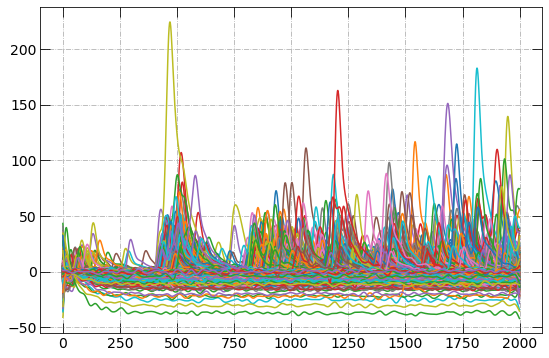

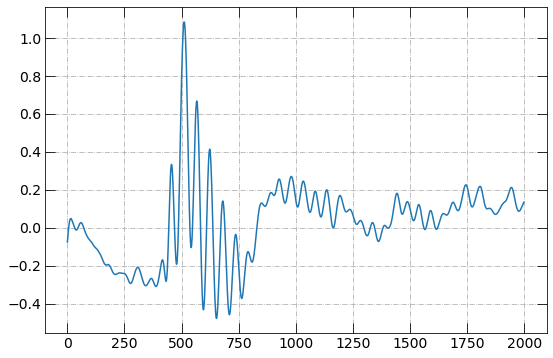

In [9]:
for row in eventSel:
    b, a = signal.butter(3, 0.05)
    y = signal.filtfilt(b, a, row)
    
    plt.plot(y)
plt.show()

b, a = signal.butter(3, 0.05)
y1 = signal.filtfilt(b, a, eventSel)
    
plt.plot(y1.mean(axis=0))
plt.show()

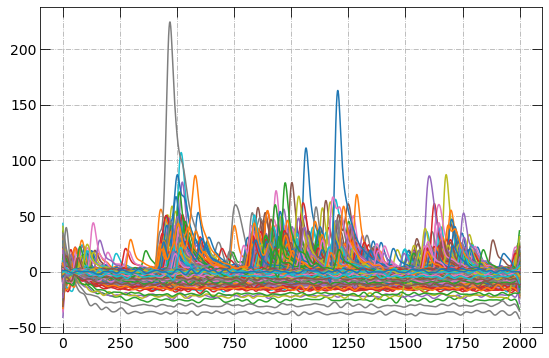

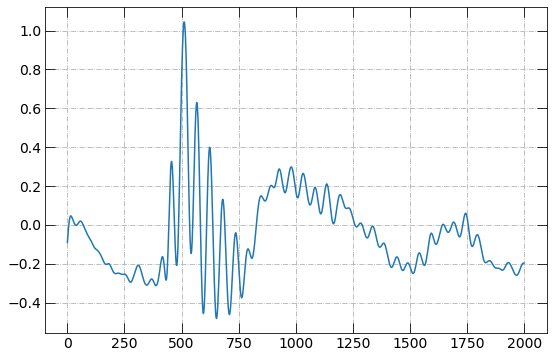

In [10]:
for row in test:
    b, a = signal.butter(3, 0.05)
    y = signal.filtfilt(b, a, row)
    
    plt.plot(y)
plt.show()

b, a = signal.butter(3, 0.05)
y1 = signal.filtfilt(b, a, test)
    
plt.plot(y1.mean(axis=0))
plt.show()

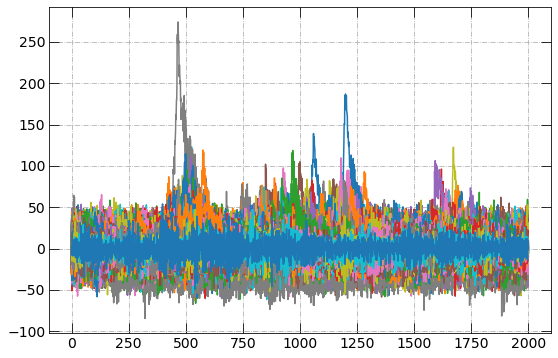

In [11]:
baseline = test[0:test.size, 0:100].mean(axis=1)
#print(arr.size)
#Nevent = (baseline.size)
#print('nevent', Nevent)
blines = baseline.reshape(baseline.size, 1)
clean = test-blines
clean.shape
for row in clean:
    #plt.ylim(-10000,10000)

    plt.plot(row)
    #print(row)
    #gauss=gaussian_filter(row, sigma=1)

    #plt.plot(gauss)

In [12]:
from scipy import stats

pkl_file = open('../2020-02-21_14-17-51.pkl', 'rb')
mydata = pickle.load(pkl_file)
mydata.keys()
dict_s = {}
#arr=mydata['Ch1']
for key, value in mydata.items():
        linreg_array = np.array([])
        for row in mydata[key][:,:250]:
            y = row
            x = np.arange(len(row))

            slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
            trend = np.absolute(slope)
            mask = [trend < 0.001]

            linreg_array = np.append(linreg_array, mask, axis=0)
            linreg_array=linreg_array > 0
            # print(mask)
            # print(trend)
            # plt.plot(row)
        eventSel=arr[linreg_array]
        print(eventSel.shape)
        
        linreg_array2 = np.array([])
        for row in eventSel[:,1400:2000]:
            y = row
            #print(y.shape)
            x = np.arange(len(row))

            slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
            trend=np.absolute(slope)

            mask=[trend < 0.001 ]

            linreg_array2 = np.append(linreg_array2, mask, axis=0)
            linreg_array2 = linreg_array2 > 0
            #print(mask)
            #print(trend)
            #plt.plot(row)
        test=eventSel[linreg_array2]
        print(test.shape)


        baseline = eventSel[0:eventSel.size, 0:100].mean(axis=1)
        blines = baseline.reshape(baseline.size, 1)
        clean = eventSel-blines
        data = clean.mean(axis=0)
        dict_s.update({key: data})

FileNotFoundError: [Errno 2] No such file or directory: '../2020-02-21_14-17-51.pkl'

In [ ]:
dict_s

In [ ]:
for key, value in dict_s.items():
    b, a = signal.butter(3, 0.05)
    
    zi = signal.lfilter_zi(b, a)
    z, _ = signal.lfilter(b, a, value, zi=zi*data[0])
    z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
    z3, _ = signal.lfilter(b, a, z2, zi=zi*z[0])
    z4, _ = signal.lfilter(b, a, z3, zi=zi*z[0])
    y = signal.filtfilt(b, a, value)    
    
    xtime=range(1, len(z) + 1),
    plt.plot(z, label=key, linewidth=2)
#plt.title('RUN_'+str(os.path.splitext(filename)[0]))
plt.grid(True)
plt.legend() 
#plt.yscale('log')
#plt.ylim(1,100)

plot_path = os.path.abspath('run_filt') 
plt.show()    